#**LOGISTIC REGRESSION WITH PYTHON**

##**Python graded task**

###Task goal:
Create a logistic regression model and to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

###Requirements:
1. Create a logistic regression model and estimate predictions.
2. Interpret models' coefficients and Odd ratios.
3. Assess the model with performance metrics.

###Evaluation Criteria
Minimum requirements are fulfilled: used different data types, used functions to handle datasets, used Numpy, Pandas and any of the visualizations package: Matplotlib, Seaborn, Plotly
Followed structured approach to data analysis
Quality of Python code

###The Minimum Requirements for the Graded Task
Use Python data types: a list, a dictionary, an array, a dataframe.
Use Python functions to work with a dataset: join, filter, delete elements, etc.
Use Numpy and Pandas packages.
Use at least one package for visualization: Matplotlib, Seaborn, Plotly.
Use at least 3 different charts in your project.

###Dataset description
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

####**Variables:**
* Sex: male or female(Nominal)
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Current Smoker: whether or not the patient is a current smoker (Nominal)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

Source: https://docs.google.com/spreadsheets/d/1tZ88HZd75ONCiWr7plt9QYFmuJmaV15nt5NWRZhpuug/edit#gid=286475905

## Table of Contents
* [0. Initialization](#0-initialization)
* [1. Exploratory Data Analysis (EDA)](#1-exploratory-data-analysis-eda)
    * [1.1 Multicolinearity of variables and their correlation with target variable](#11-multicolinearity-of-variables-and-their-correlation-with-target-variable)
    * [1.2 Outliers](#12-outliers)
* [2. Model Creation](#2-model-creation)
    * [2.1 Logistic Regression Model](#23-logistic-regression-model)
* [3. Model Application in Practice](#3-model-application-in-practice)
    * [3.1 Confusion Matrix](#31-confusion-matrix)
    * [3.2 ROC Curve](#32-roc-curve)
* [4. Insights and recommendations](#4-insights-and-recommendations)

##0. Initialization
Importing necessary libraries for calculations and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


Opening data CSV file

In [2]:
#Import raw data to clean in the python
import gdown
file_id = "11bULwYdMq6dsNnxt_gtHGRDPxBQ2VKZ5"

# Define the URL for the file download
url = f"https://drive.google.com/uc?id={file_id}"

# Specify the output CSV file name
output_csv = "regression_model_in_python_raw_data.csv"

# Download the file
gdown.download(url, output_csv, quiet=False)
data = pd.read_csv(output_csv, decimal='.')

Downloading...
From: https://drive.google.com/uc?id=11bULwYdMq6dsNnxt_gtHGRDPxBQ2VKZ5
To: /content/regression_model_in_python_raw_data.csv
100%|██████████| 196k/196k [00:00<00:00, 72.4MB/s]


## 1. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) - investigation and familiarization of the data. The goal of EDA is to understand the data, generate first insights & questions.
For example, we can ask ourselves such questions:
* Are the column names understandable? Are they too long? Are there duplicated names?
* Are there missing values? How best to clean them (if there's alot of missing values in each column and our dataset is small, removing them might not be the best option)?
* What are the value counts?
* Are the data values understandable? Do we need to convert or encode them?

Reading the file and splitting data into training and testing datasets

**EDA steps:**

1. Understanding the dataset, for example: head, tail, shape, info, describe.<br>
2. Cleaning, for example: .isduplicated(), .duplicated().<br>
3. Univariate analysis is the deep dive into the variables of interest, for example: .value_counts(), .describe(), plotting the variables of interest.<br>
4. Modeling or further analysis.<br>
Reference: https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

In [3]:
# Display the first few rows of the dataset to verify its structure
print("First 5 rows of data:")
print( data.head())

# Display the last few rows of the dataset to verify its structure
print("Last 5 rows of data:")
print(data.tail())

First 5 rows of data:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           

In [4]:
# Check the data types of each column and presence of null values
# More info: https://www.codecademy.com/learn/stats-variable-types/modules/stats-variable-types/cheatsheet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
# Checking for missing values in columns
missing_values = data.isnull().sum()

# Calculate the percentage of missing values
total_values = data.shape[0]
missing_percentage = (missing_values / total_values) * 100

# Create a DataFrame to display both number and percentage of missing values
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display the missing values information
print(missing_info)

# Similar code, but output is in a table:
# data[data.isnull().any(axis=1)]

                 Missing Values  Percentage
male                          0    0.000000
age                           0    0.000000
education                   105    2.477584
currentSmoker                 0    0.000000
cigsPerDay                   29    0.684285
BPMeds                       53    1.250590
prevalentStroke               0    0.000000
prevalentHyp                  0    0.000000
diabetes                      0    0.000000
totChol                      50    1.179802
sysBP                         0    0.000000
diaBP                         0    0.000000
BMI                          19    0.448325
heartRate                     1    0.023596
glucose                     388    9.155262
TenYearCHD                    0    0.000000


Cleaning the data

In [6]:
# Fill missing values in the 'glucose' column with the median
glucose_median = data['glucose'].median()
data['glucose'].fillna(glucose_median, inplace=True)

# Drop rows with missing values for all columns except 'glucose'
data_cleaned = data.dropna(subset=data.columns.difference(['glucose']))

# Display the cleaned data
print(data_cleaned)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [7]:
# number of unique values in each column
data=data_cleaned
data.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             244
sysBP               232
diaBP               145
BMI                1338
heartRate            73
glucose             138
TenYearCHD            2
dtype: int64

In [8]:
# checking for duplicates
data.duplicated().sum()

0

In [9]:
# view the number of rows and columns
print(data.shape)

(3987, 16)


In [10]:
# printing summary statistics
print(data.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  3987.000000  3987.000000  3987.000000    3987.000000  3987.000000   
mean      0.433158    49.478806     1.981941       0.491096     9.020316   
std       0.495574     8.531588     1.020696       0.499983    11.914558   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3987.000000      3987.000000   3987.000000  3987.000000  3987.000000   
mean      0.029345         0.005518      0.309506     0.025332   236.620517   
std       0.168794         0.074087      0.462348     0.157152    44.019766   

In [11]:
# how many positive and negative samples do we have?
data.value_counts('TenYearCHD')

TenYearCHD
0    3392
1     595
dtype: int64

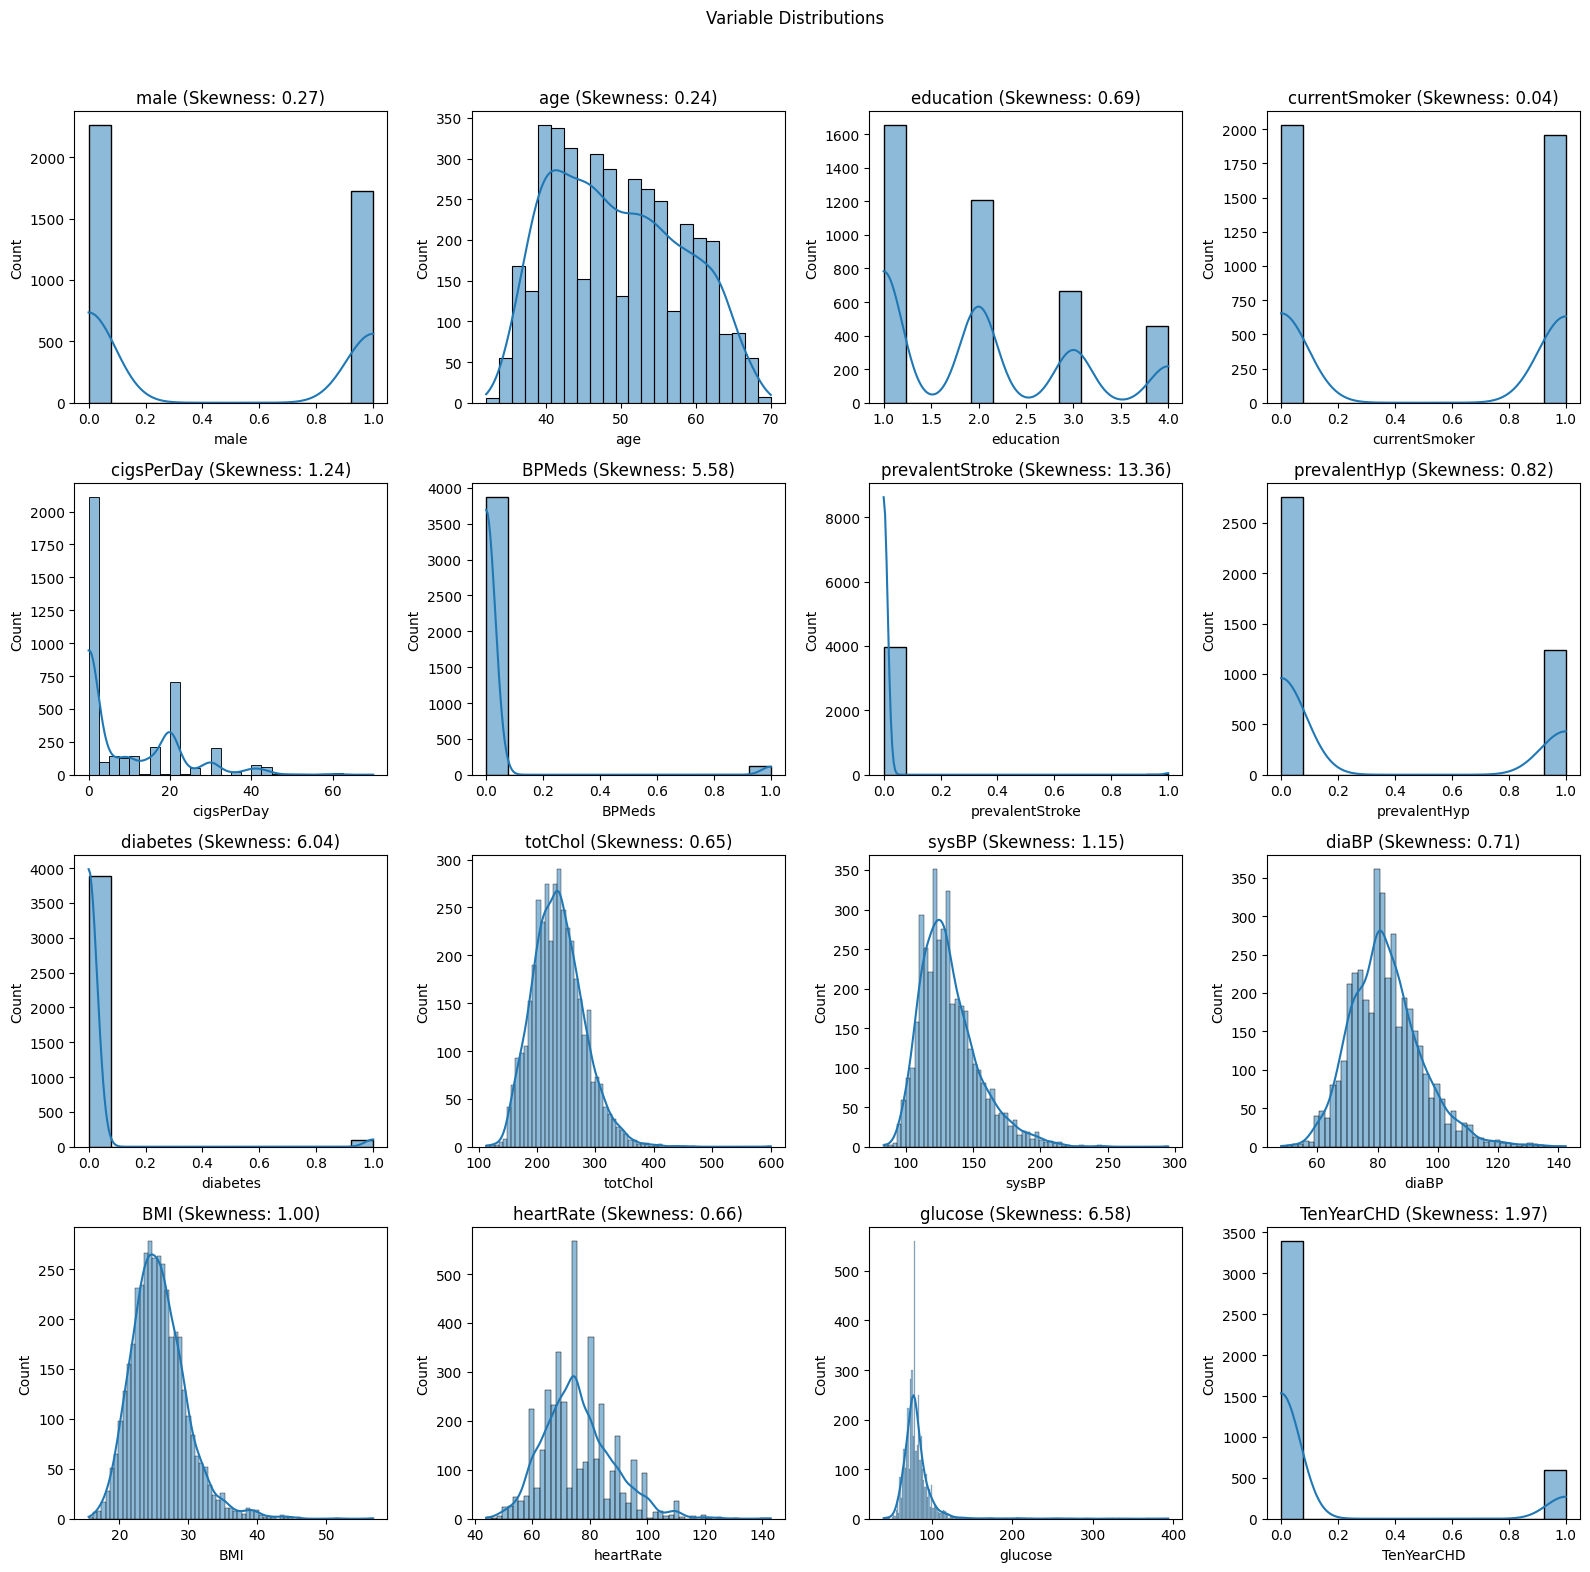

male                0.269892
age                 0.237940
education           0.686177
currentSmoker       0.035635
cigsPerDay          1.241483
BPMeds              5.579478
prevalentStroke    13.355412
prevalentHyp        0.824443
diabetes            6.043900
totChol             0.648518
sysBP               1.150982
diaBP               0.708640
BMI                 1.003843
heartRate           0.661752
glucose             6.578517
TenYearCHD          1.969561
dtype: float64


In [12]:
skewness = data.skew()

# Create subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
fig.suptitle('Variable Distributions')

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, (feature, skew_val) in enumerate(skewness.items()):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature} (Skewness: {skew_val:.2f})')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()
print(skewness)

**Observations:**

Column names need explanation (see the start of the project). <br>
Values are all floats or integers, no need to encode them.<br>
No null values.<br>
3987 rows and 16 columns.<br>
595 positive and 3392 negative samples.<br>
Feature columns have light right-skewness. Therefore it is recommended to use median dealing with outliers

### 1.1. Multicolinearity of variables and their correlation with target variable

To build a regression model with the target variable "TenYearCHD" while addressing multicollinearity and focusing on the most relevant predictors, a subset of independent variables should be selected.

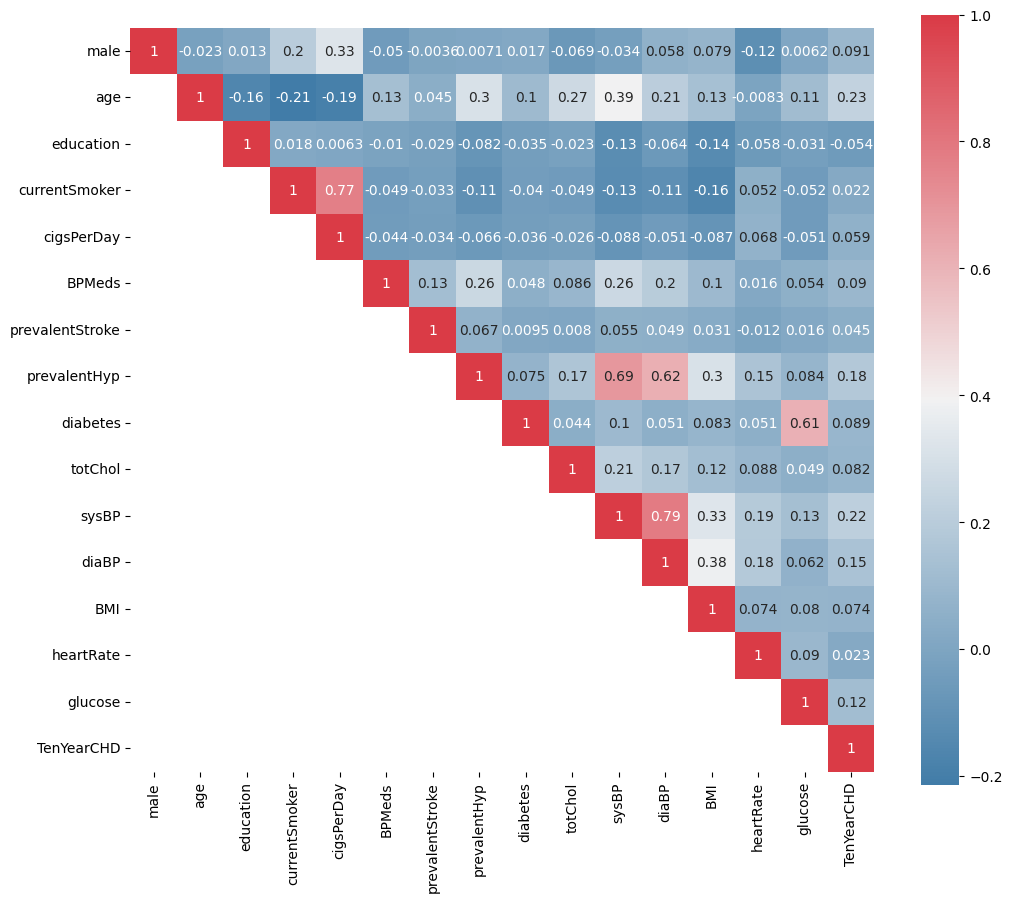

In [13]:
# Calculate the correlation matrix
corr_train = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr_train, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            square=True, ax=ax, mask=np.tri(*corr_train.shape, dtype=bool, k=-1))

# Show the plot
plt.show()


In [14]:
# Display the correlation values with the target variable
# Extract the correlations of features with the target variable
corr_with_target = corr_train['TenYearCHD'].sort_values(ascending=False)
print("Correlation with Target variable (TenYearCHD):")
print(corr_with_target)

Correlation with Target variable (TenYearCHD):
TenYearCHD         1.000000
age                0.229569
sysBP              0.217395
prevalentHyp       0.176389
diaBP              0.148570
glucose            0.118990
male               0.091301
BPMeds             0.089835
diabetes           0.089268
totChol            0.082359
BMI                0.074007
cigsPerDay         0.059259
prevalentStroke    0.044821
heartRate          0.023009
currentSmoker      0.022244
education         -0.053974
Name: TenYearCHD, dtype: float64


Based on the provided correlation data and considering multicollinearity, the following variables should be included into regression model:

* age: Age has a relatively strong positive correlation with "TenYearCHD" (0.21) and is often a significant predictor in cardiovascular risk models.

* sysBP: Systolic Blood Pressure ("sysBP") has a strong positive correlation with "TenYearCHD" (0.215) and is a key cardiovascular risk factor.

* prevalentHyp: Prevalent Hypertension ("prevalentHyp") has a moderate positive correlation with "TenYearCHD" (0.18) and is a known cardiovascular risk factor.

* glucose: Glucose has a positive correlation with "TenYearCHD" (0.113), indicating a potential role in predicting cardiovascular risk.

* male: Gender ("male") has a moderate positive, correlation with "TenYearCHD" (0.091). Gender can be a significant predictor in cardiovascular risk models.

* diabetes: the factor if the patient had diabetes has a low but positive correlation with "TenYearCHD" (0,094)

* BPMeds: Blood Pressure Medications ("BPMeds") have a low but positive correlation with "TenYearCHD" (0.096), and it's worth considering in the model.

These variables have relatively strong associations with the target variable and exhibit a manageable level of multicollinearity.

The highest correlation coefficient available between any pair of independent variables is approximately:
* 0.78 ("sysBP" and "diaBP")
* 0,77 ("cigsPerDay" and "CurrentSmoker")
* 0,62 ("diabetes" and "glucose").

Those variables is not recommended to use together in the regression model.

Correlation does not imply causation and it's important to keep in mind that other factors may also influence the risk of heart deceases.

### 1.2. Outliers

In order to estimate the outlier the IQR method was used to count percentage of outliers for X axis variables

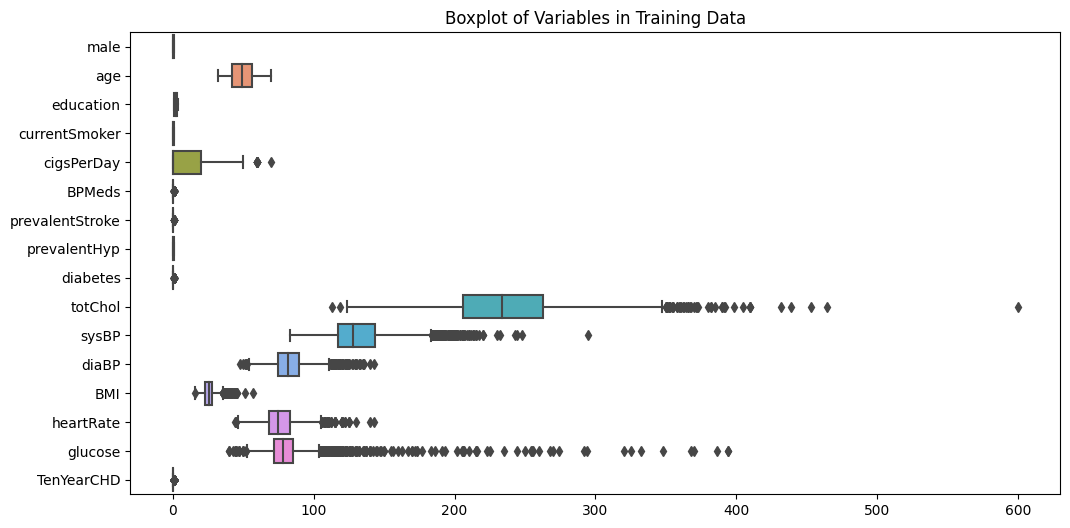

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data, orient="h")
plt.title("Boxplot of Variables in Training Data")
plt.show()

In [16]:
# calculating quartile range and IQR for all columns in data
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # calculating upper and lower limit
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # filtering to see the outliers
    outliers_upper = data[data[column] > upper_limit]
    outliers_lower = data[data[column] < lower_limit]

    # calculate percentage of outliers
    total_values = data[column].count()
    percentage_upper = ((outliers_upper.shape[0] + outliers_lower.shape[0]) / total_values) * 100

    print(f"Column: {column}")
    print(f"Lower limit: {lower_limit:.2f}")
    print(f"Upper limit: {upper_limit:.2f}")
    print(f"Number of outliers in the upper limit: {outliers_upper.shape[0]}")
    print(f"Number of outliers in the lower limit: {outliers_lower.shape[0]}")
    print(f"Total percentage of outliers: {percentage_upper:.2f}%\n")


Column: male
Lower limit: -1.50
Upper limit: 2.50
Number of outliers in the upper limit: 0
Number of outliers in the lower limit: 0
Total percentage of outliers: 0.00%

Column: age
Lower limit: 21.00
Upper limit: 77.00
Number of outliers in the upper limit: 0
Number of outliers in the lower limit: 0
Total percentage of outliers: 0.00%

Column: education
Lower limit: -2.00
Upper limit: 6.00
Number of outliers in the upper limit: 0
Number of outliers in the lower limit: 0
Total percentage of outliers: 0.00%

Column: currentSmoker
Lower limit: -1.50
Upper limit: 2.50
Number of outliers in the upper limit: 0
Number of outliers in the lower limit: 0
Total percentage of outliers: 0.00%

Column: cigsPerDay
Lower limit: -30.00
Upper limit: 50.00
Number of outliers in the upper limit: 11
Number of outliers in the lower limit: 0
Total percentage of outliers: 0.28%

Column: BPMeds
Lower limit: 0.00
Upper limit: 0.00
Number of outliers in the upper limit: 117
Number of outliers in the lower limit:

## 2. Model Creation

To create a logistic regression model the data will be splitted into training and test datasets. For logistic regression model estimation 2 trainimg dataset options will be investigated - with and without outliers

In [23]:
#Splitting data into training and test datasets
from sklearn.model_selection import train_test_split

# Replace 'column_name_for_x' with the actual column name(s) you want to use as features
x = data.drop(columns='TenYearCHD', axis=1)

# Replace 'column_name_for_y' with the actual column name you want to predict
y = data['TenYearCHD']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify= y)

# Display the shapes of the resulting datasets to verify the split
print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)


Training set shape: (3189, 15) (3189,)
Test set shape: (798, 15) (798,)


###2.3 Logistic Regression Model


The IQR method outlier evaluation show that the most outliers are for variable "glucose" (5,21%) therefore creating the logistic regression model it will estimated with and without "glucose" variable outliers (glucose outliers more than 1,5 times above and under the mean (52,5 and 104,5). The logistic model with outliers:


In [24]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Create and train logistic regression model on scaled data
model_original = LogisticRegression()
model_original.fit(x_train_scaled, y_train)

# Add a constant term to the features matrix for statsmodels
x_train_with_const = sm.add_constant(x_train)

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y_train, x_train_with_const)
result = logit_model.fit()

# Extract p-values from the result
p_values = result.pvalues

# Display summary results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.375926
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3189
Model:                          Logit   Df Residuals:                     3173
Method:                           MLE   Df Model:                           15
Date:                Sun, 31 Dec 2023   Pseudo R-squ.:                  0.1080
Time:                        04:38:53   Log-Likelihood:                -1198.8
converged:                       True   LL-Null:                       -1343.9
Covariance Type:            nonrobust   LLR p-value:                 6.017e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.5007      0.764     -9.822      0.000      -8.997      -6.004
male          

**Choosing variables for the model**<br>
Regression analysis shows that some variable are nor statistically significant therefore only variables with p-values less than 0,05 are considered to choose.

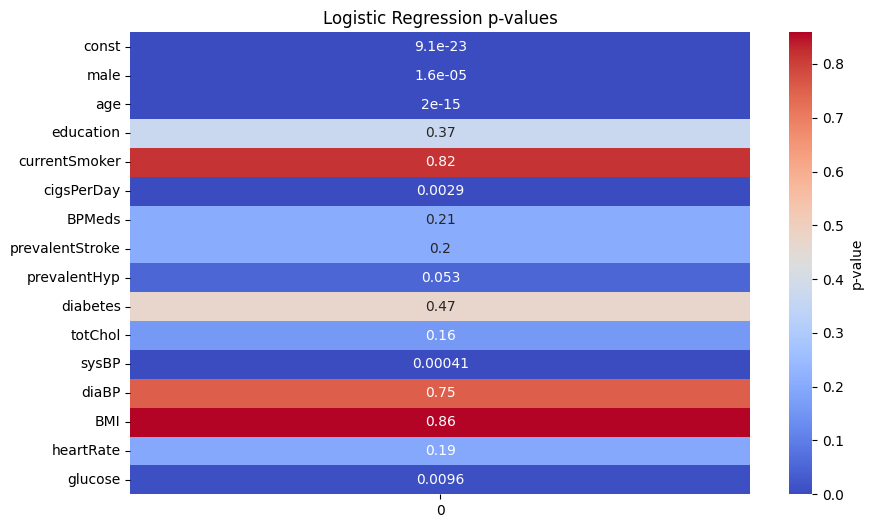

In [25]:
# Plot heatmap of p-values
plt.figure(figsize=(10, 6))
sns.heatmap(p_values.to_frame(), annot=True, cmap="coolwarm", cbar_kws={'label': 'p-value'})
plt.title("Logistic Regression p-values")
plt.show()

To compare if are more significant values in the model without outliers there was estimated logistic regression model when 'glucose' column outliers are removed

In [20]:
# Drop rows with outliers in the 'glucose' column
column_to_drop_outliers = 'glucose'
Q1 = x_train[column_to_drop_outliers].quantile(0.25)
Q3 = x_train[column_to_drop_outliers].quantile(0.75)
IQR = Q3 - Q1

# Calculating upper and lower limit for the column
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify outliers
outliers_index = (x_train[column_to_drop_outliers] < lower_limit) | (x_train[column_to_drop_outliers] > upper_limit)

# Drop rows with outliers
x_train = x_train[~outliers_index]
y_train = y_train[~outliers_index]

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Convert the scaled array back to a DataFrame with column names
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# Make sure the indices are aligned
y_train = y_train.reset_index(drop=True)
x_train_scaled_df = x_train_scaled_df.reset_index(drop=True)

# Add a constant term to the features matrix for statsmodels
x_train_with_const = sm.add_constant(x_train_scaled_df)

# Fit logistic regression model using statsmodels
logit_model = sm.Logit(y_train, x_train_with_const)
result = logit_model.fit()

# Extract p-values from the result
p_values = result.pvalues

# Display summary results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.368779
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3023
Model:                          Logit   Df Residuals:                     3007
Method:                           MLE   Df Model:                           15
Date:                Sun, 31 Dec 2023   Pseudo R-squ.:                 0.09706
Time:                        04:38:25   Log-Likelihood:                -1114.8
converged:                       True   LL-Null:                       -1234.7
Covariance Type:            nonrobust   LLR p-value:                 1.661e-42
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.0369      0.063    -32.420      0.000      -2.160      -1.914
male          

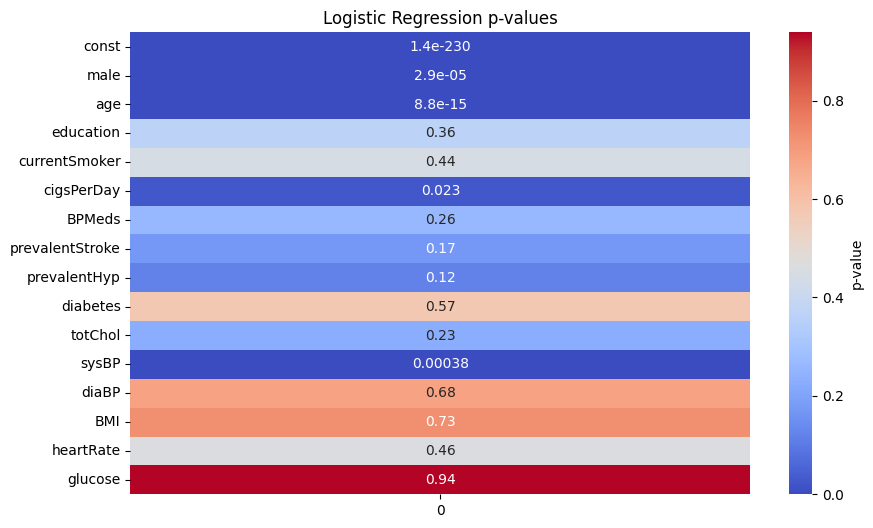

In [21]:
# Plot heatmap of p-values
plt.figure(figsize=(10, 6))
sns.heatmap(p_values.to_frame(), annot=True, cmap="coolwarm", cbar_kws={'label': 'p-value'})
plt.title("Logistic Regression p-values")
plt.show()

The evaluation of 2 options with 'glucose' outliers and without them shows that in the regression model with outliers, there are more significant variables (p values < 0,05). So for further evaluation with test dataset the following variables were selected:
* Male
* age
* cigsPerDay
* sysBP
* glucose

##3. Model Application in Practice

The regression with selected columns will be aplied for test dataset to build a predictions

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# List of significant columns
significant_columns = ['male', 'age', 'cigsPerDay', 'sysBP', 'glucose']

# Extract only the significant columns from the test dataset
x_test_significant = x_test[significant_columns]

# Create a logistic regression model
reg = LogisticRegression(max_iter=10000)
reg.fit(x_test_significant, y_test)

# Predictions on the test set using significant columns
y_pred_significant = reg.predict(x_test_significant)

# Probabilities for class 1 (Heart Disease) using significant columns
probabilities_significant = reg.predict_proba(x_test_significant)[:, 1]

# Coefficients and intercept
coefficients = reg.coef_[0]
intercept = reg.intercept_[0]

# Calculate logit using significant columns
logit = np.dot(x_test_significant, coefficients) + intercept

# Calculate odds
odds = np.exp(logit)

# Calculate probabilities using the sigmoid function
probabilities_calculated = 1 / (1 + np.exp(-logit))

# Calculate log-likelihood
log_likelihood = np.sum(y_test * np.log(probabilities_significant) + (1 - y_test) * np.log(1 - probabilities_significant))

# Assuming y_test and y_pred_significant are the true and predicted labels
accuracy = accuracy_score(y_test, y_pred_significant)
precision = precision_score(y_test, y_pred_significant)
recall = recall_score(y_test, y_pred_significant)
f1 = f1_score(y_test, y_pred_significant)
roc_auc = roc_auc_score(y_test, probabilities_significant)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.8596
Precision: 0.6522
Recall: 0.1261
F1 Score: 0.2113
ROC AUC: 0.7684


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test and y_pred_significant are the true and predicted labels

# Display coefficients
print("Coefficients:")
for feature, coef in zip(significant_columns, coefficients):
    print(f"{feature}: {coef:.4f}")

# Display intercept
print(f"\nIntercept: {intercept:.4f}")

# Display odds
print("\nOdds:")
for feature, odd in zip(significant_columns, np.exp(coefficients)):
    print(f"{feature}: {odd:.4f}")

# Display probabilities
print("\nProbabilities:")
for feature, prob in zip(significant_columns, probabilities_calculated):
    print(f"{feature}: {prob:.4f}")


Coefficients:
male: 0.4933
age: 0.0956
cigsPerDay: 0.0278
sysBP: 0.0147
glucose: 0.0088

Intercept: -9.9472

Odds:
male: 1.6378
age: 1.1004
cigsPerDay: 1.0282
sysBP: 1.0148
glucose: 1.0088

Probabilities:
male: 0.0458
age: 0.0741
cigsPerDay: 0.2838
sysBP: 0.0507
glucose: 0.1589


In [28]:
# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_significant})
# print(df)

# you can do the above 2 lines, but this looks better visually:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_significant})

,Actual,Predicted
2673,0,0
262,0,0
4036,0,0
1685,0,0
3965,0,0
...,...,...
721,0,1
325,1,0
2487,0,0
1924,0,0


### 3.1 Confusion Matrix


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test and y_pred_significant are the true and predicted labels

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_significant)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_significant)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[671   8]
 [104  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       679
           1       0.65      0.13      0.21       119

    accuracy                           0.86       798
   macro avg       0.76      0.56      0.57       798
weighted avg       0.83      0.86      0.82       798



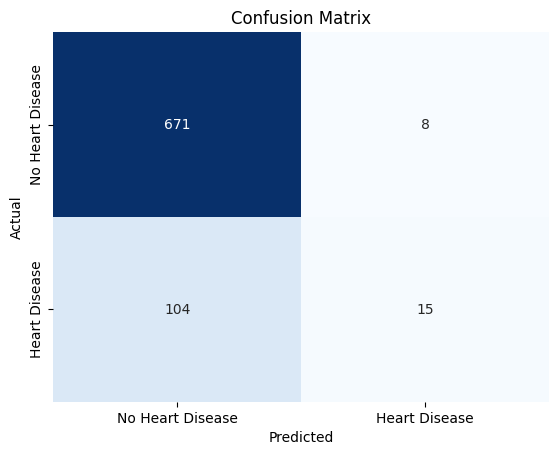

True Positives (TP): 15
False Positives (FP): 8
True Negatives (TN): 671
False Negatives (FN): 104

True Positive Rate (Sensitivity/Recall): 0.1261
False Positive Rate: 0.0118


In [30]:
# Assuming conf_matrix is the confusion matrix obtained from your model
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# Extract TP, FP, TN, FN from the confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Display TP, FP, TN, FN
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

# Calculate True Positive Rate (Sensitivity/Recall)
TPR = TP / (TP + FN)
print(f"\nTrue Positive Rate (Sensitivity/Recall): {TPR:.4f}")

# Calculate False Positive Rate
FPR = FP / (FP + TN)
print(f"False Positive Rate: {FPR:.4f}")

###3.2 ROC Curve

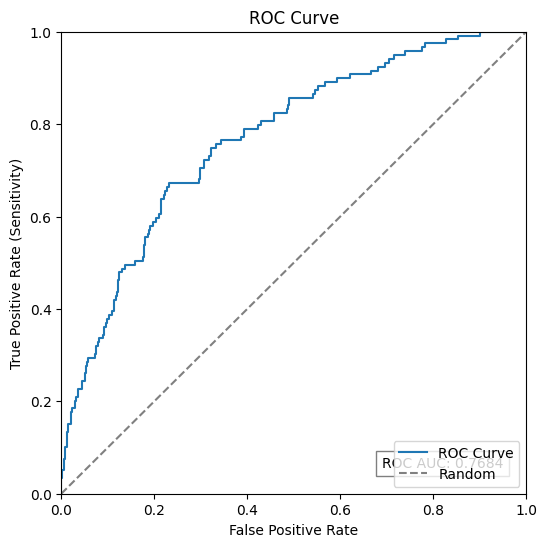

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming reg is your classifier, x_test is your test data, and y_test is your true labels

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, reg.predict_proba(x_test_significant)[:, 1])

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, reg.predict_proba(x_test_significant)[:, 1])

# Plot ROC curve
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr, tpr, label='ROC Curve')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate (Sensitivity)')
ax.set_title('ROC Curve')
ax.legend(loc='lower right')

# Display ROC AUC score in the bottom right corner of the plot
ax.text(0.95, 0.05, f'ROC AUC: {roc_auc:.4f}', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## 4. Insights and recommendations

Accuracy of current regression model shows that 81% of the all predictions made by the model are correct.
Precision indicates that out of 86% of for negative and 65% positive predictions made by the model are correct.
Recall suggests that the model is only able to correctly identify 12% of the actual positive instances in the dataset.

True Positive (TP) Rate (0.12) is the same as the recall. It represents the proportion of true positive predictions relative to all actual positive instances.

False Positive (FP) Rate (0.018) shows the proportion of negative instances that were incorrectly classified as positive by the model. It is calculated as the ratio of false positives to all actual negative instances.

Low recall values might cause imbalansed data set with more negative (0) values rather than positive (1) values. Also it might be adjusted by lowering cut-off threshold.

Created model need to be evaluated with more balanced data set. During training phase choosen variables seems to be good predictors for target variable of 10 year THD therefore it is recommended to collect more data and choosing it for testing make sure that it is well balanced. One of the option it might be data balancing by using downsampling strategy in a way that target classes will be at ratio of 50:50.